In [6]:
import igraph as ig
import pickle
import matplotlib.pyplot as plt

# PageRank for tracking innovative compounds

In [13]:
G_1980_01 = pickle.load(file=open("Data/Graphs/G_cpd_1980-01.p", "rb"))
G_1980_02 = pickle.load(file=open("Data/Graphs/G_cpd_1980-02.p", "rb"))
print(ig.summary(G_1980_01))
print(ig.summary(G_1980_02))

IGRAPH UN-- 26788 2193731 -- 
+ attr: date (v), name (v)
None
IGRAPH UN-- 25420 2505482 -- 
+ attr: date (v), name (v)
None


In [27]:
#Goal = link pageranks across years

#Put pagerank into graph attributes
G_1980_01.vs["pagerank"] = G_1980_01.pagerank()
G_1980_02.vs["pagerank"] = G_1980_02.pagerank()

In [36]:
#Find maximum pagerank value - this should persist across years
max_pr = max(G_1980_01.vs["pagerank"])
max_name = G_1980_01.vs.select(pagerank_eq=max_pr)["name"][0]
print(max_name)

SCHEMBL34


In [37]:
print(G_1980_01.vs.select(name_eq=max_name)["pagerank"])
print(G_1980_02.vs.select(name_eq=max_name)["pagerank"])

[0.001987030819485658]
[0.0018958511955712804]


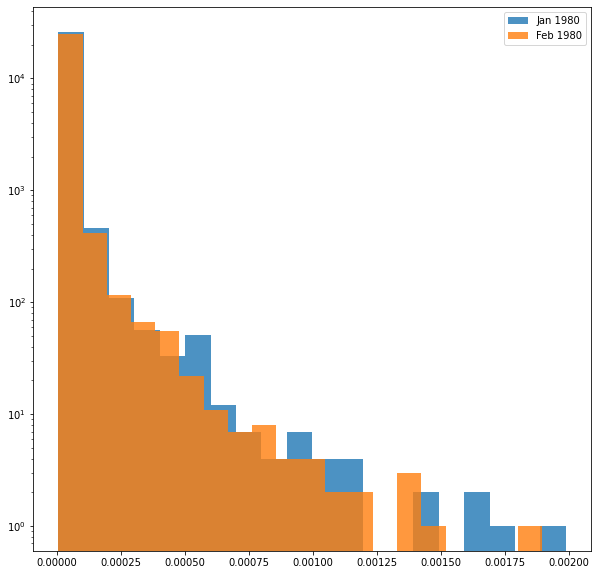

In [42]:
plt.figure(figsize=(10,10))

plt.hist(G_1980_01.vs["pagerank"], alpha=0.8, bins=20, label="Jan 1980")
plt.hist(G_1980_02.vs["pagerank"], alpha=0.8, bins=20, label="Feb 1980")

plt.yscale("log")
plt.legend()

In [12]:
del(G_2009)